# 市场数据可视化

本笔记本用于测试MarketDataProvider的功能，并对深度数据进行可视化分析。

In [1]:
import sys
import os
from datetime import datetime, timedelta
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 配置绘图风格
plt.style.use('ggplot')
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [2]:
# 导入MarketDataProvider
from market_data_provider import MarketDataProvider

## 1. 配置市场数据和参数

In [3]:
# 测试用的instruments配置
instruments = {
    "swap": {
        "name": "okex_swap_btcusdt",
        "data_path": "/data/l2/okex/okex_swap_btcusdt",
    },
    "spot": {
        "name": "okex_spot_btc_usdt",
        "data_path": "/data/l2/okex/okex_spot_btc_usdt",
    }
}

date = "2025-01-06"  # 测试日期
hour_offset = 2      # 从凌晨2点开始
interval_ms = 1000   # 1秒间隔

## 2. 读取深度数据

In [4]:
# 创建数据提供者
provider = MarketDataProvider(instruments, date, hour_offset, data_type="Depth")

print(f"开始时间: {provider.start_datetime}")
print(f"结束时间: {provider.end_datetime}")
print(f"需要使用的文件: {[provider.start_date, provider.end_date] if provider.start_date != provider.end_date else [provider.start_date]}")

开始时间: 2025-01-06 02:00:00
结束时间: 2025-01-07 02:00:00
需要使用的文件: ['2025-01-06', '2025-01-07']


In [5]:
# 按1秒间隔读取数据 (k=3表示保留前3层深度)
df = provider.read_all_depth_by_interval(interval_ms=interval_ms, k=3)

已读取 100 条间隔数据(保留: 99, 跳过: 0)... 耗时: 0.08秒
已读取 200 条间隔数据(保留: 199, 跳过: 0)... 耗时: 0.15秒
已读取 300 条间隔数据(保留: 299, 跳过: 0)... 耗时: 0.24秒
已读取 400 条间隔数据(保留: 399, 跳过: 0)... 耗时: 0.32秒
已读取 500 条间隔数据(保留: 499, 跳过: 0)... 耗时: 0.40秒
已读取 600 条间隔数据(保留: 599, 跳过: 0)... 耗时: 0.49秒
已读取 700 条间隔数据(保留: 699, 跳过: 0)... 耗时: 0.57秒
已读取 800 条间隔数据(保留: 799, 跳过: 0)... 耗时: 0.64秒
已读取 900 条间隔数据(保留: 899, 跳过: 0)... 耗时: 0.72秒
已读取 1000 条间隔数据(保留: 999, 跳过: 0)... 耗时: 0.80秒
已读取 1100 条间隔数据(保留: 1099, 跳过: 0)... 耗时: 0.88秒
已读取 1200 条间隔数据(保留: 1199, 跳过: 0)... 耗时: 0.96秒
已读取 1300 条间隔数据(保留: 1299, 跳过: 0)... 耗时: 1.04秒
已读取 1400 条间隔数据(保留: 1399, 跳过: 0)... 耗时: 1.11秒
已读取 1500 条间隔数据(保留: 1499, 跳过: 0)... 耗时: 1.19秒
已读取 1600 条间隔数据(保留: 1599, 跳过: 0)... 耗时: 1.25秒
已读取 1700 条间隔数据(保留: 1699, 跳过: 0)... 耗时: 1.32秒
已读取 1800 条间隔数据(保留: 1799, 跳过: 0)... 耗时: 1.39秒
已读取 1900 条间隔数据(保留: 1899, 跳过: 0)... 耗时: 1.45秒
已读取 2000 条间隔数据(保留: 1999, 跳过: 0)... 耗时: 1.53秒
已读取 2100 条间隔数据(保留: 2099, 跳过: 0)... 耗时: 1.61秒
已读取 2200 条间隔数据(保留: 2199, 跳过: 0)... 耗时: 1.68秒
已读取 2300 条间隔数据(保留: 2299, 跳过: 0

In [6]:
# 查看数据基本信息
print(f"DataFrame形状: {df.shape}")
print("\nDataFrame列名:")
print(df.columns)
print("\nDataFrame前5行:")
df.head(5)

DataFrame形状: (85343, 26)

DataFrame列名:
['timestamp', 'datetime', 'swap_bid1', 'swap_bid_amount1', 'swap_ask1', 'swap_ask_amount1', 'swap_bid2', 'swap_bid_amount2', 'swap_ask2', 'swap_ask_amount2', 'swap_bid3', 'swap_bid_amount3', 'swap_ask3', 'swap_ask_amount3', 'spot_bid1', 'spot_bid_amount1', 'spot_ask1', 'spot_ask_amount1', 'spot_bid2', 'spot_bid_amount2', 'spot_ask2', 'spot_ask_amount2', 'spot_bid3', 'spot_bid_amount3', 'spot_ask3', 'spot_ask_amount3']

DataFrame前5行:


timestamp,datetime,swap_bid1,swap_bid_amount1,swap_ask1,swap_ask_amount1,swap_bid2,swap_bid_amount2,swap_ask2,swap_ask_amount2,swap_bid3,swap_bid_amount3,swap_ask3,swap_ask_amount3,spot_bid1,spot_bid_amount1,spot_ask1,spot_ask_amount1,spot_bid2,spot_bid_amount2,spot_ask2,spot_ask_amount2,spot_bid3,spot_bid_amount3,spot_ask3,spot_ask_amount3
f64,datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.7361e9,2025-01-06 02:00:00.016,97744.8,550.599976,97744.9,287.600006,97744.0,12.4,97745.0,10.2,97743.8,38.0,97746.0,9.8,97735.3,0.244375,97735.4,0.190028,97735.1,0.007054,97737.1,0.00001,97734.2,0.020259,97737.8,0.019102
1.7361e9,2025-01-06 02:00:01.016,97744.8,230.0,97744.9,349.700012,97743.4,1.0,97745.0,10.2,97743.3,1.3,97745.5,0.6,97735.3,0.217798,97735.4,0.182163,97735.1,0.007054,97737.1,0.00001,97734.8,0.021438,97738.1,0.0042
1.7361e9,2025-01-06 02:00:02.026,97744.8,245.699997,97744.9,364.700012,97741.2,1.0,97745.0,10.2,97741.1,1.6,97745.6,0.6,97735.3,0.217798,97735.4,0.181649,97735.1,0.007054,97737.1,0.00001,97734.8,0.021438,97738.1,0.0042
1.7361e9,2025-01-06 02:00:03.026,97744.8,56.900002,97744.9,329.399994,97744.4,0.2,97745.0,10.2,97741.1,1.3,97746.0,0.7,97735.3,0.15453,97735.4,0.233456,97735.1,0.007054,97736.1,0.011512,97732.5,0.001,97737.1,0.00001
1.7361e9,2025-01-06 02:00:04.026,97731.4,78.400002,97731.5,553.299988,97731.2,0.1,97731.7,1.0,97730.1,0.1,97732.0,6.6,97725.5,0.076458,97725.6,0.55167,97721.5,0.023828,97725.7,0.020937,97720.7,0.006101,97725.9,0.016


## 3. 数据处理和简单统计

In [7]:
# 计算时间间隔统计
df_with_diff = df.with_columns(
    pl.col("timestamp").diff().alias("time_diff")
)

print("时间间隔统计 (秒):")
print(f"平均间隔: {df_with_diff['time_diff'].mean():.3f}秒")
print(f"最小间隔: {df_with_diff['time_diff'].min():.3f}秒")
print(f"最大间隔: {df_with_diff['time_diff'].max():.3f}秒")
print(f"标准差: {df_with_diff['time_diff'].std():.3f}秒")

时间间隔统计 (秒):
平均间隔: 1.012秒
最小间隔: 1.000秒
最大间隔: 1.810秒
标准差: 0.030秒


In [8]:
# 计算中间价(mid price)和价差(spread)
df = df.with_columns([
    ((pl.col("swap_bid1") + pl.col("swap_ask1")) / 2).alias("swap_mid"),
    ((pl.col("spot_bid1") + pl.col("spot_ask1")) / 2).alias("spot_mid"),
    (pl.col("swap_ask1") - pl.col("swap_bid1")).alias("swap_spread"),
    (pl.col("spot_ask1") - pl.col("spot_bid1")).alias("spot_spread")
])

# 计算期现差价
df = df.with_columns([
    (pl.col("swap_mid") - pl.col("spot_mid")).alias("swap_spot_diff"),
    ((pl.col("swap_mid") / pl.col("spot_mid") - 1) * 100).alias("swap_spot_diff_pct")
])

# 查看新增列
df.select(["timestamp", "datetime", "swap_mid", "spot_mid", "swap_spread", "spot_spread", "swap_spot_diff", "swap_spot_diff_pct"]).head(5)

timestamp,datetime,swap_mid,spot_mid,swap_spread,spot_spread,swap_spot_diff,swap_spot_diff_pct
f64,datetime[μs],f64,f64,f64,f64,f64,f64
1.7361e9,2025-01-06 02:00:00.016,97744.85,97735.35,0.1,0.1,9.5,0.00972
1.7361e9,2025-01-06 02:00:01.016,97744.85,97735.35,0.1,0.1,9.5,0.00972
1.7361e9,2025-01-06 02:00:02.026,97744.85,97735.35,0.1,0.1,9.5,0.00972
1.7361e9,2025-01-06 02:00:03.026,97744.85,97735.35,0.1,0.1,9.5,0.00972
1.7361e9,2025-01-06 02:00:04.026,97731.45,97725.55,0.1,0.1,5.9,0.006037


## 4. 数据可视化

In [9]:
# 转换为pandas DataFrame以便绘图
pdf = df.to_pandas()

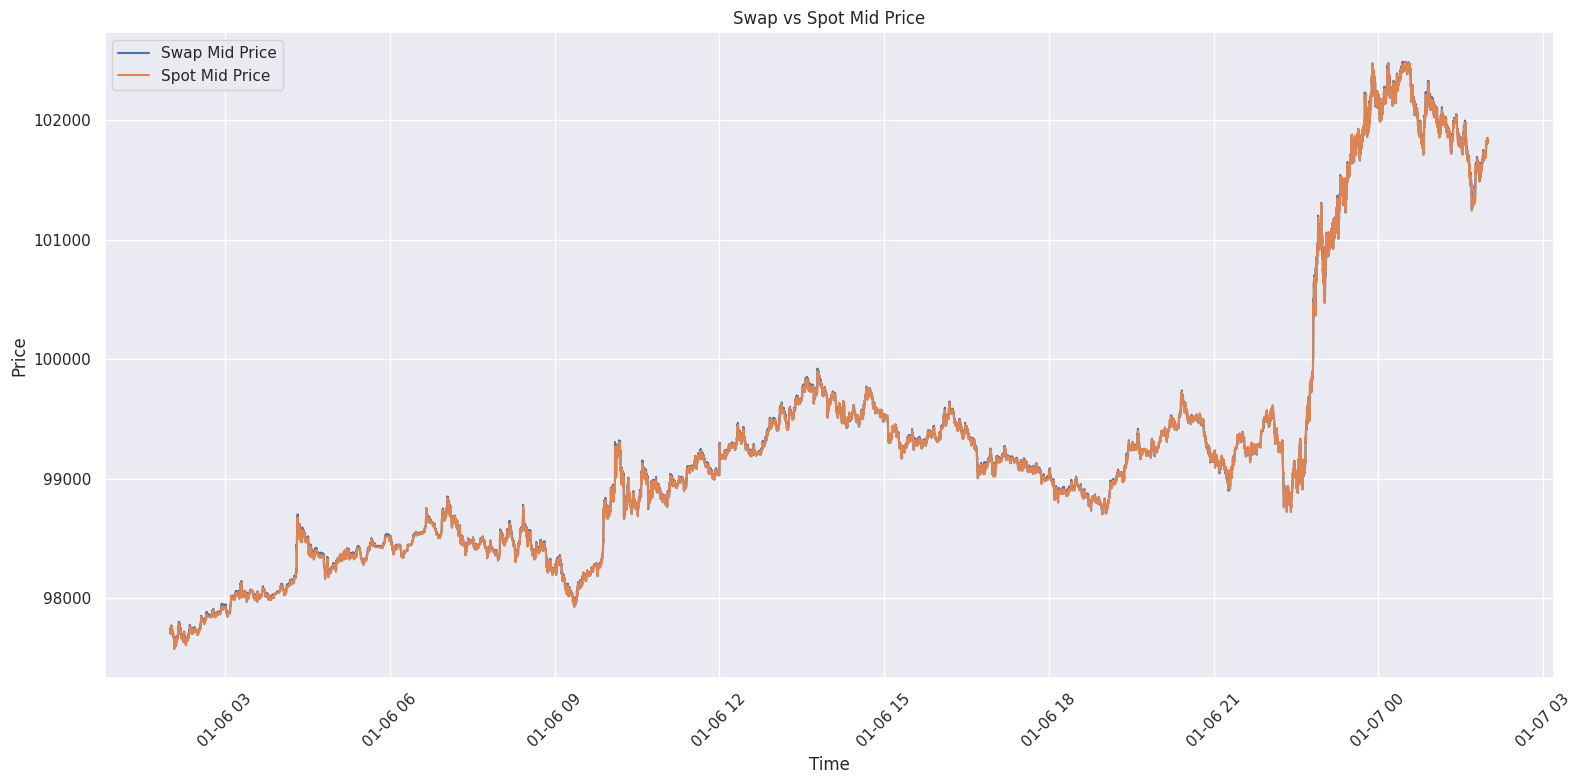

In [10]:
# 绘制期货和现货的中间价格走势
plt.figure(figsize=(16, 8))
plt.plot(pdf['datetime'], pdf['swap_mid'], label='Swap Mid Price', linewidth=1.5)
plt.plot(pdf['datetime'], pdf['spot_mid'], label='Spot Mid Price', linewidth=1.5)
plt.title('Swap vs Spot Mid Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

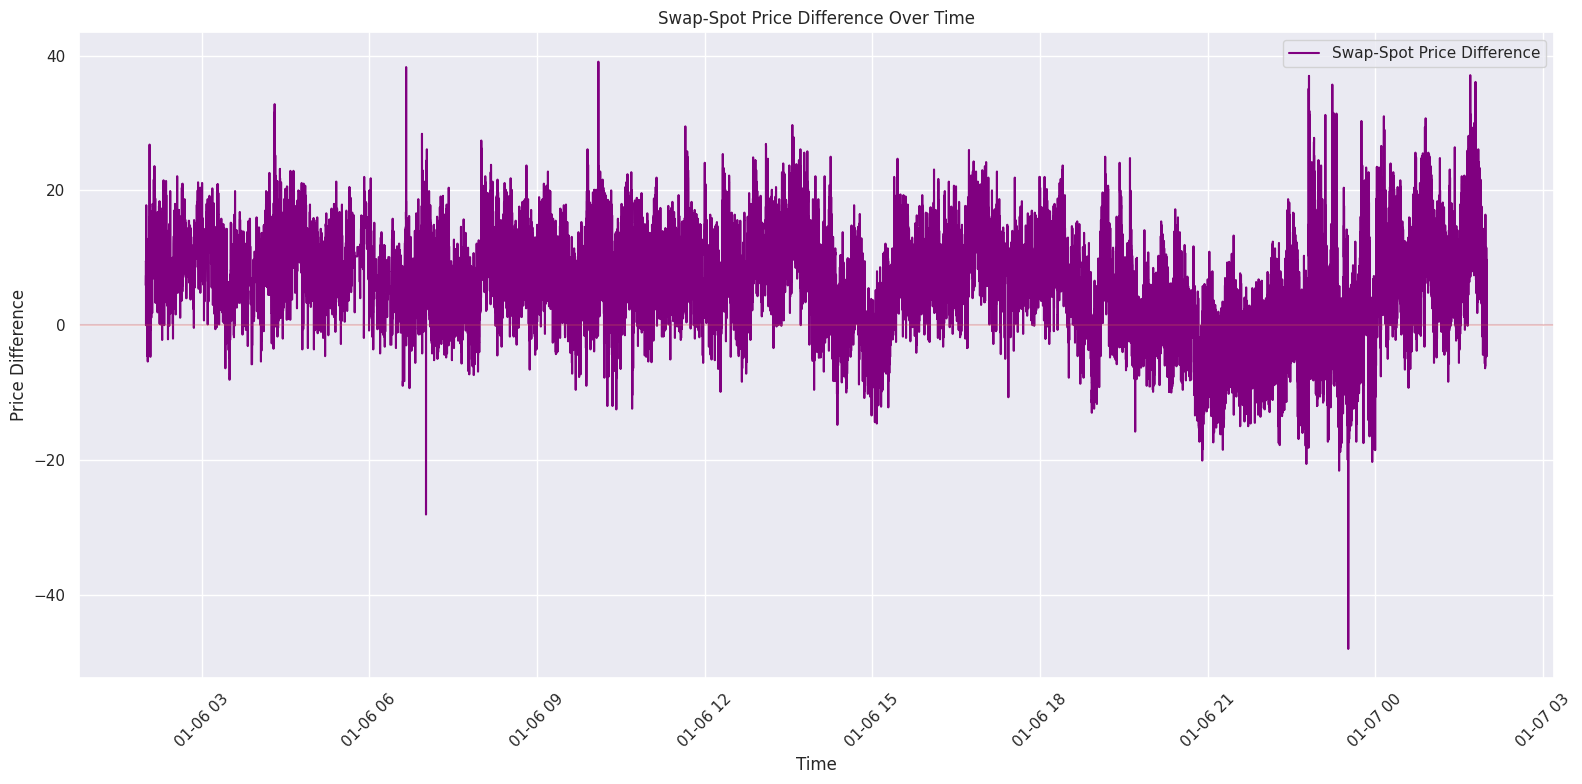

In [11]:
# 绘制期现差价走势
plt.figure(figsize=(16, 8))
plt.plot(pdf['datetime'], pdf['swap_spot_diff'], label='Swap-Spot Price Difference', color='purple', linewidth=1.5)
plt.title('Swap-Spot Price Difference Over Time')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

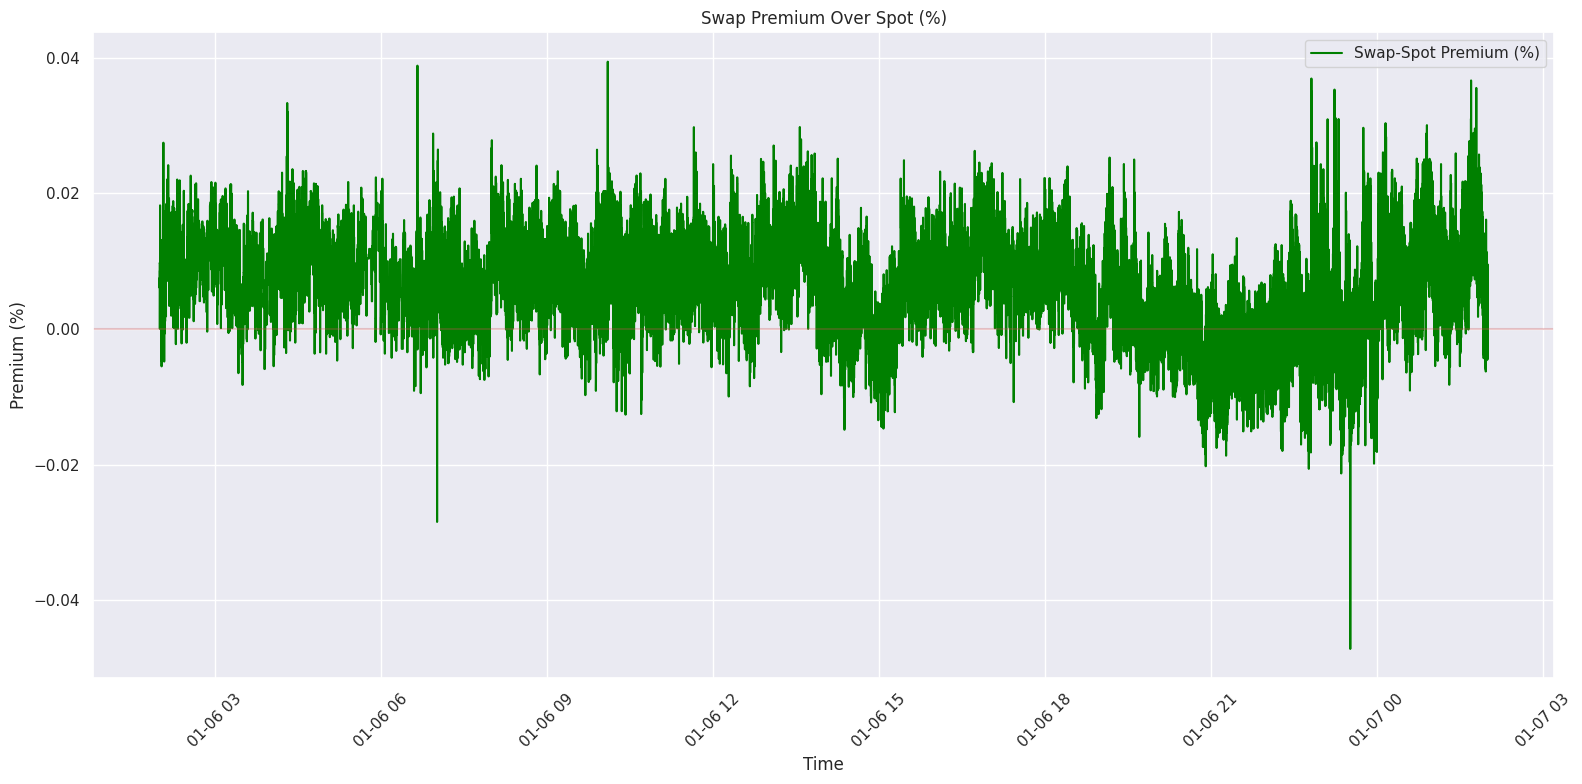

In [12]:
# 绘制期现价差百分比走势
plt.figure(figsize=(16, 8))
plt.plot(pdf['datetime'], pdf['swap_spot_diff_pct'], label='Swap-Spot Premium (%)', color='green', linewidth=1.5)
plt.title('Swap Premium Over Spot (%)')
plt.xlabel('Time')
plt.ylabel('Premium (%)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

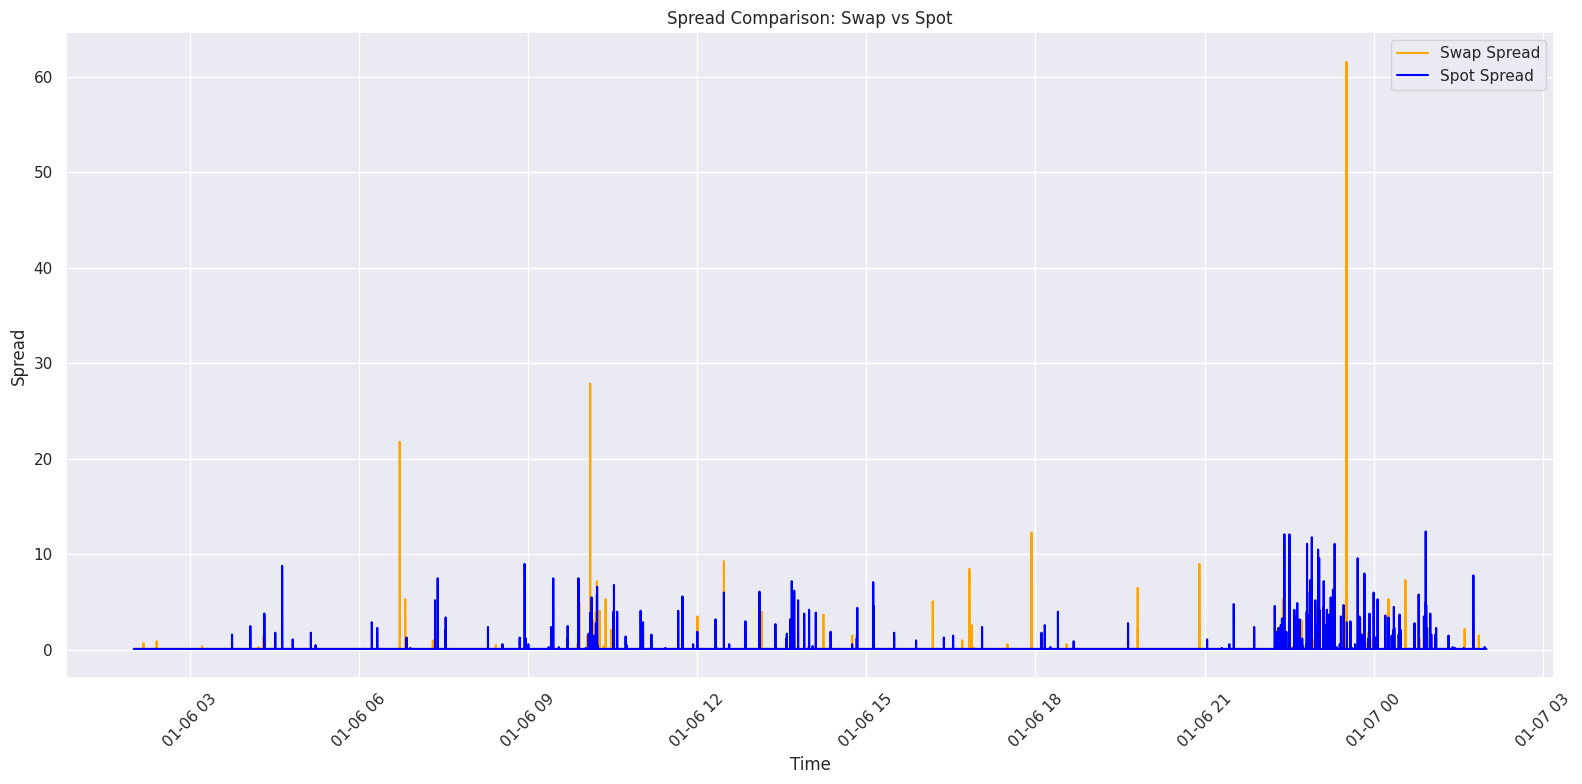

In [13]:
# 绘制期货和现货的价差(spread)
plt.figure(figsize=(16, 8))
plt.plot(pdf['datetime'], pdf['swap_spread'], label='Swap Spread', color='orange', linewidth=1.5)
plt.plot(pdf['datetime'], pdf['spot_spread'], label='Spot Spread', color='blue', linewidth=1.5)
plt.title('Spread Comparison: Swap vs Spot')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

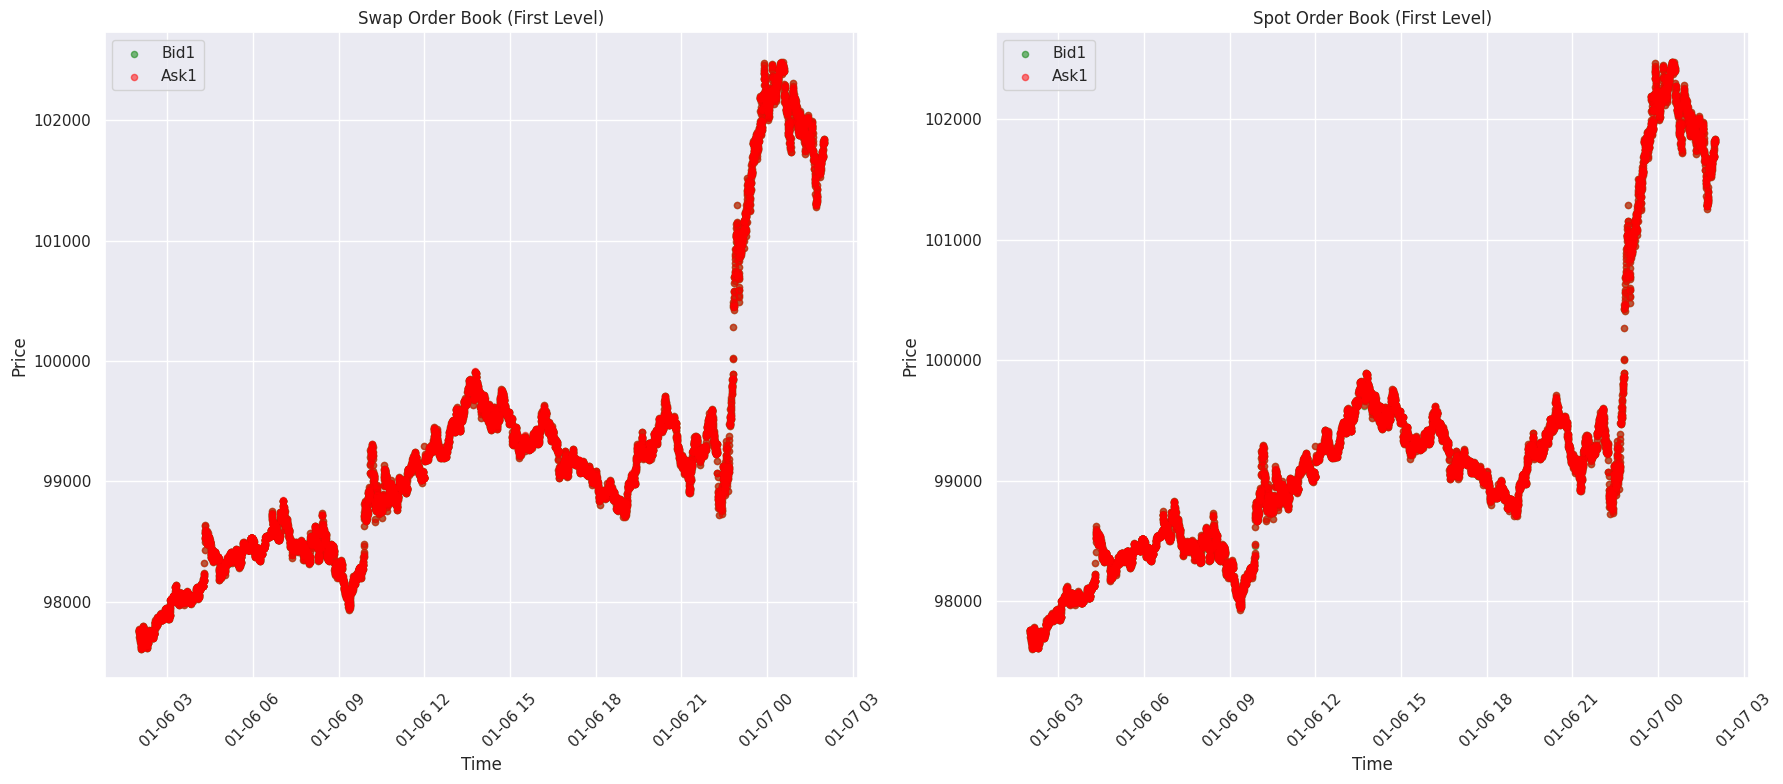

In [14]:
# 绘制swap和spot的深度分布 (第一层深度)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 采样以减少数据点，提高可视化效率 (每10个点取一个)
sample_rate = 10
pdf_sampled = pdf.iloc[::sample_rate, :]

# Swap深度图
ax1.scatter(pdf_sampled['datetime'], pdf_sampled['swap_bid1'], c='green', alpha=0.5, s=20, label='Bid1')
ax1.scatter(pdf_sampled['datetime'], pdf_sampled['swap_ask1'], c='red', alpha=0.5, s=20, label='Ask1')
ax1.set_title('Swap Order Book (First Level)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Spot深度图
ax2.scatter(pdf_sampled['datetime'], pdf_sampled['spot_bid1'], c='green', alpha=0.5, s=20, label='Bid1')
ax2.scatter(pdf_sampled['datetime'], pdf_sampled['spot_ask1'], c='red', alpha=0.5, s=20, label='Ask1')
ax2.set_title('Spot Order Book (First Level)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Price')
ax2.legend()
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

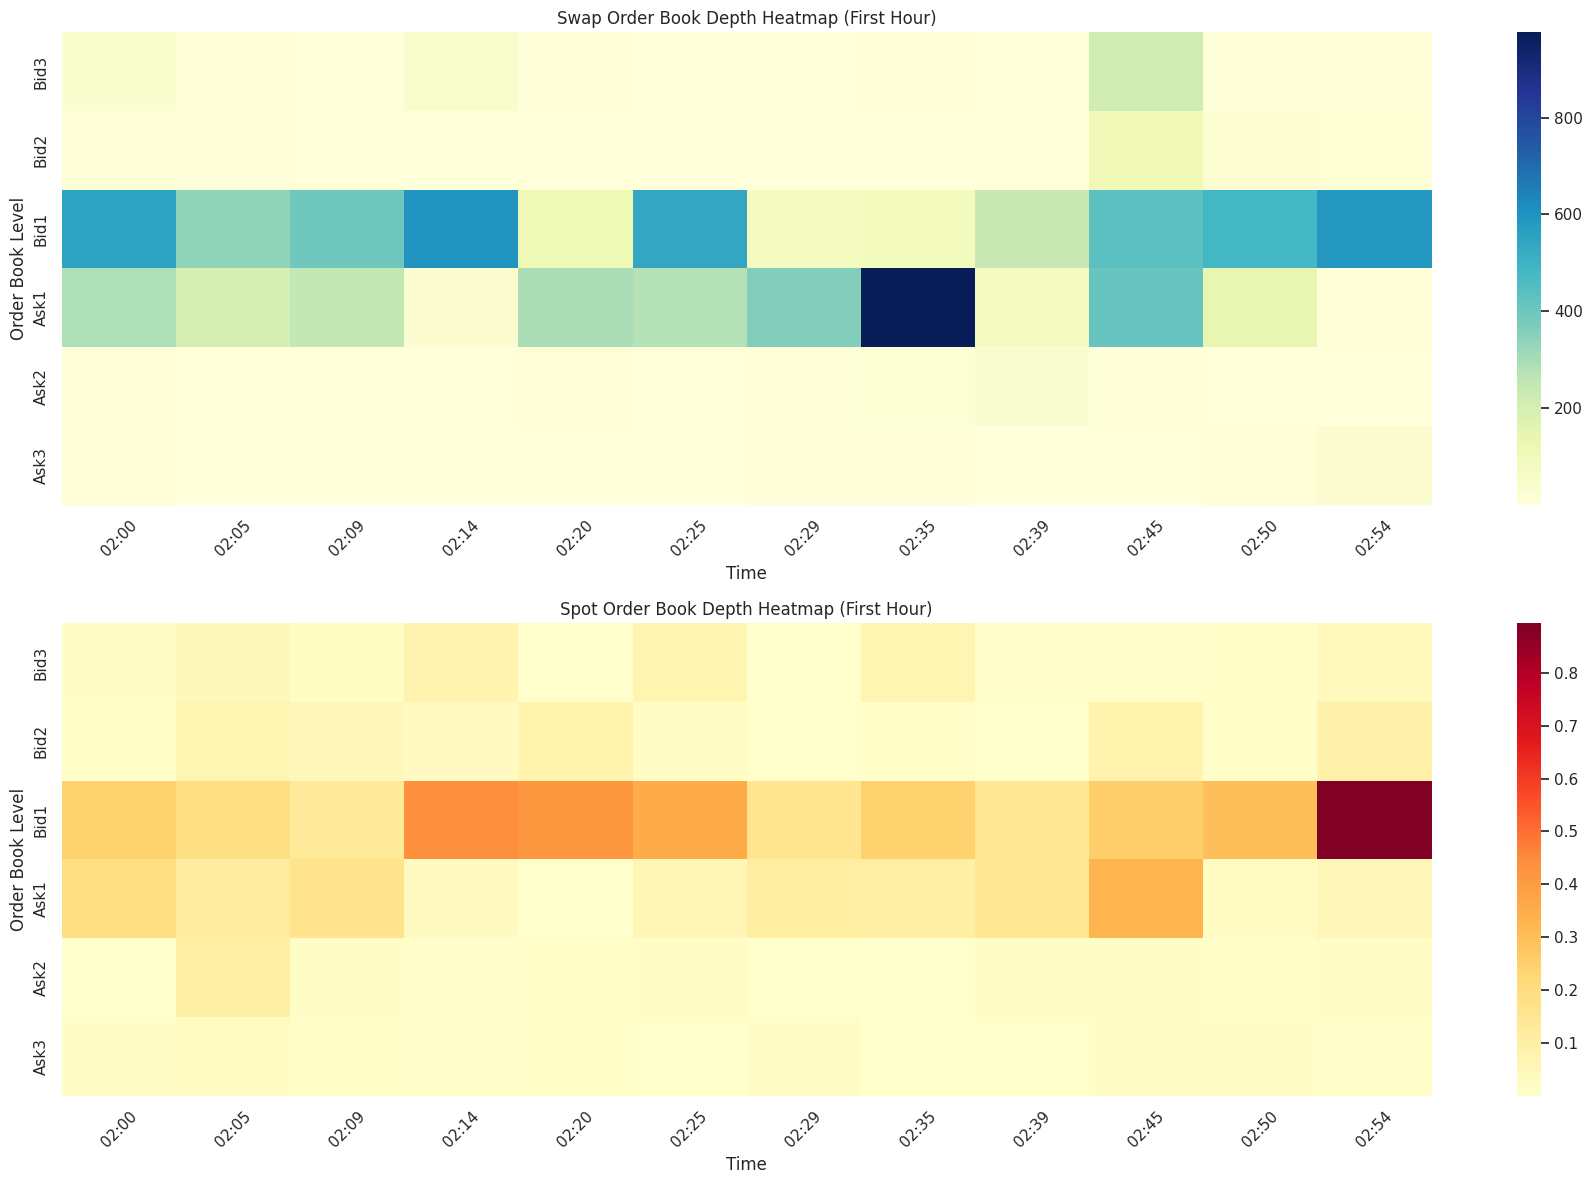

In [15]:
# 绘制深度热图 (以时间为X轴，价格层级为Y轴，颜色表示挂单量)
# 由于数据点太多，我们选取一个小时的数据窗口进行可视化

# 选取数据的一个子集（例如前1小时的数据）
start_time = pdf['datetime'].min()
end_time = start_time + timedelta(hours=1)
hour_data = pdf[(pdf['datetime'] >= start_time) & (pdf['datetime'] <= end_time)]

# 每5分钟采样一个点
sample_interval = 5 * 60  # 5分钟，以秒为单位
sample_indices = []
current_ts = hour_data['timestamp'].min()
max_ts = hour_data['timestamp'].max()

while current_ts <= max_ts:
    nearest_idx = hour_data['timestamp'].sub(current_ts).abs().idxmin()
    sample_indices.append(nearest_idx)
    current_ts += sample_interval

sampled_hour_data = hour_data.loc[sample_indices]

# 准备热图数据
timestamps = sampled_hour_data['datetime']
levels = ['Bid3', 'Bid2', 'Bid1', 'Ask1', 'Ask2', 'Ask3']

# Swap深度热图
swap_heatmap_data = []
for _, row in sampled_hour_data.iterrows():
    swap_heatmap_data.append([row['swap_bid_amount3'], row['swap_bid_amount2'], row['swap_bid_amount1'],
                             row['swap_ask_amount1'], row['swap_ask_amount2'], row['swap_ask_amount3']])
    
swap_heatmap_data = np.array(swap_heatmap_data)

# Spot深度热图
spot_heatmap_data = []
for _, row in sampled_hour_data.iterrows():
    spot_heatmap_data.append([row['spot_bid_amount3'], row['spot_bid_amount2'], row['spot_bid_amount1'],
                             row['spot_ask_amount1'], row['spot_ask_amount2'], row['spot_ask_amount3']])
    
spot_heatmap_data = np.array(spot_heatmap_data)

# 绘制热图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# 格式化时间轴标签
time_labels = [t.strftime('%H:%M') for t in timestamps]

# Swap深度热图
sns.heatmap(swap_heatmap_data.T, cmap="YlGnBu", ax=ax1, 
            xticklabels=time_labels,
            yticklabels=levels)
ax1.set_title('Swap Order Book Depth Heatmap (First Hour)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Order Book Level')
ax1.tick_params(axis='x', rotation=45)

# Spot深度热图
sns.heatmap(spot_heatmap_data.T, cmap="YlOrRd", ax=ax2, 
            xticklabels=time_labels,
            yticklabels=levels)
ax2.set_title('Spot Order Book Depth Heatmap (First Hour)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Order Book Level')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. 套利机会分析

In [ ]:
# 设定套利阈值：当期现价差超过此阈值时视为潜在套利机会
threshold_pct = 0.1  # 0.1%

# 标记套利机会
df = df.with_columns([
    pl.when(pl.col("swap_spot_diff_pct") > threshold_pct)
    .then(pl.lit(1))  # swap价格高，可以做空swap，做多spot
    .when(pl.col("swap_spot_diff_pct") < -threshold_pct)
    .then(pl.lit(-1))  # swap价格低，可以做多swap，做空spot
    .otherwise(pl.lit(0))
    .alias("arb_signal")
])

# 转换为pandas进行可视化
pdf = df.to_pandas()

In [ ]:
# 统计套利机会
arb_counts = pdf['arb_signal'].value_counts()
print("套利信号统计:")
print(f"1 (做空swap做多spot): {arb_counts.get(1, 0)} 次")
print(f"-1 (做多swap做空spot): {arb_counts.get(-1, 0)} 次")
print(f"0 (无套利机会): {arb_counts.get(0, 0)} 次")

arb_percentage = (arb_counts.get(1, 0) + arb_counts.get(-1, 0)) / len(pdf) * 100
print(f"\n套利机会百分比: {arb_percentage:.2f}%")

In [ ]:
# 绘制期现差价与套利信号
plt.figure(figsize=(16, 10))

# 绘制价差百分比
plt.plot(pdf['datetime'], pdf['swap_spot_diff_pct'], label='Price Difference (%)', color='gray', alpha=0.7, linewidth=1)

# 标记套利机会
arb_positive = pdf[pdf['arb_signal'] == 1]
arb_negative = pdf[pdf['arb_signal'] == -1]

plt.scatter(arb_positive['datetime'], arb_positive['swap_spot_diff_pct'], 
           color='green', alpha=0.8, s=30, label='Long Spot Short Swap')
plt.scatter(arb_negative['datetime'], arb_negative['swap_spot_diff_pct'], 
           color='red', alpha=0.8, s=30, label='Long Swap Short Spot')

# 添加阈值线
plt.axhline(y=threshold_pct, color='green', linestyle='--', alpha=0.5, label=f'Upper Threshold ({threshold_pct}%)')
plt.axhline(y=-threshold_pct, color='red', linestyle='--', alpha=0.5, label=f'Lower Threshold (-{threshold_pct}%)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)

plt.title('Arbitrage Opportunities Based on Swap-Spot Price Difference')
plt.xlabel('Time')
plt.ylabel('Price Difference (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. 保存数据

In [ ]:
# 保存处理后的数据
output_file = f"market_data_{date}_interval{interval_ms}ms.parquet"
df.write_parquet(output_file)
print(f"数据已保存至: {output_file}")

In [ ]:
# 关闭数据提供者
provider.close()
print("数据提供者已关闭")